# Homework 

## Load Data

Import Library

In [235]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Import Dataset

In [236]:
#Direktori Dataset disesuaikan

url = 'https://drive.google.com/file/d/1r0qXP_unNdthoUNSrh1z8CfBwWFko_w6/view?usp=sharing'
url2= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df_dataset = pd.read_csv(url2)

Mengambil 10 data acak

In [237]:
df_dataset.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
434350,530855,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2010-11-04 14:55:00,1.25,13303.0,United Kingdom
980512,575607,22549,PICTURE DOMINOES,5,2011-11-10 12:37:00,3.29,14096.0,United Kingdom
988575,576053,23365,SET 12 COLOUR PENCILS LOVE LONDON,8,2011-11-13 14:53:00,0.65,16726.0,United Kingdom
760609,557626,23174,REGENCY SUGAR BOWL GREEN,6,2011-06-21 14:29:00,4.15,14175.0,United Kingdom
29749,491950,22114,HOT WATER BOTTLE TEA AND SYMPATHY,4,2009-12-14 15:49:00,3.95,16280.0,United Kingdom
46398,493696,21213,PACK OF 72 SKULL CAKE CASES,120,2010-01-05 13:32:00,0.42,16779.0,United Kingdom
110387,499977,84270,ASSTD DESIGN BUBBLE GUM RING,30,2010-03-03 15:13:00,0.21,14142.0,United Kingdom
525326,538167,22306,SILVER MUG BONE CHINA TREE OF LIFE,4,2010-12-09 18:58:00,1.95,14713.0,United Kingdom
683430,550215,85099C,JUMBO BAG BAROQUE BLACK WHITE,5,2011-04-15 10:43:00,4.13,NaN,United Kingdom
150765,503774,22423,REGENCY CAKESTAND 3 TIER,1,2010-04-07 11:04:00,12.75,14606.0,United Kingdom


Melihat ukuran dataset

In [238]:
df_dataset.shape

(1067371, 8)

Mencari info setiap kolom (yang non null dan tipe data)

In [239]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## Section 1

### 1.1. Create New Feature: Year

Cek Info awal

In [240]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Mengganti InvoiceDate menjadi datetime

In [241]:
df_dataset['InvoiceDate'] = pd.to_datetime(df_dataset['InvoiceDate'])
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


Mendapatkan Tahun

In [242]:
year = pd.DatetimeIndex(df_dataset['InvoiceDate']).year
year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011],
           dtype='int64', name='InvoiceDate', length=1067371)

Menambahkan Kolom Year ke Dataset

In [263]:
df_dataset['Year'] = year
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   Year         1067371 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 73.3+ MB


### 1.2. Filtering Data

Mendapatkan deskripsi Quantity

In [244]:
df_dataset['Quantity'].describe()

count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      8.099500e+04
Name: Quantity, dtype: float64

Quantity di atas atau sama dengan 1

In [245]:
quantity_valid = df_dataset[df_dataset['Quantity'] >= 1]
quantity_valid.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


Banyaknya Quantity di atas atau sama dengan 1

In [246]:
quantity_valid.shape

(1044421, 9)

Invoice Tanpa C

In [247]:
quantity_valid = quantity_valid[~quantity_valid['Invoice'].str.contains("C")]
quantity_valid.shape

(1044420, 9)

### 1.3. Create New Feature: Revenue

Buat list Revenue berisi `Quantity * Price`

In [248]:
revenue = quantity_valid['Quantity'] * quantity_valid['Price']
revenue

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1067366     12.60
1067367     16.60
1067368     16.60
1067369     14.85
1067370     18.00
Length: 1044420, dtype: float64

Masukan ke dataset

In [249]:
quantity_valid['Revenue'] = revenue
quantity_valid.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### 1.4. Average of Revenue per Year

Rata-rata per Tahun

In [250]:
bakal_plot = quantity_valid.groupby('Year')['Revenue'].mean().reset_index()
bakal_plot.rename(columns={'Revenue':'Mean'}, inplace=True)
bakal_plot['Year'] = pd.to_datetime(bakal_plot['Year'], format='%Y')
bakal_plot

,Year,Mean
0,2009-01-01,18.713273
1,2010-01-01,19.908987
2,2011-01-01,20.058767


In [251]:
bakal_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    3 non-null      datetime64[ns]
 1   Mean    3 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 176.0 bytes


Matplotlib Styles

In [252]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Visualisasi


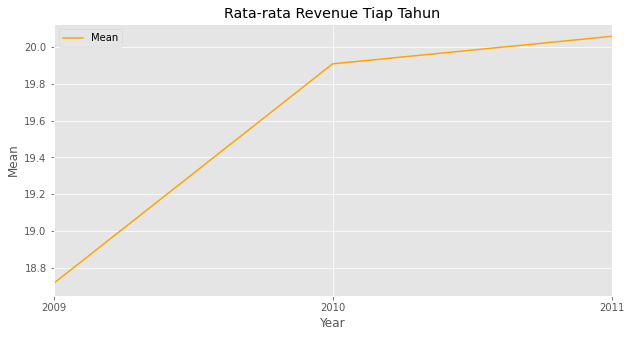

In [253]:
mpl.style.use(['fast'])

bakal_plot.plot(x='Year', y='Mean', kind='line',
                figsize=(10,5), color='orange')
plt.title('Rata-rata Revenue Tiap Tahun')
plt.ylabel('Mean')
plt.xlabel('Year')
plt.show()

### 1.5. Interpretation

Dari Output di atas, dapat dilihat bahwa tiap tahun, rata-rata penjualan (dalam poundsterling) mengalami peningkatan. Pada tahun 2009-2010 mengalami peningkatan yang tajam, sementara pada tahun 2010-2011 hanya mengalami peningkatan yang sedikit saja, tidak seperti pada tahun sebelumnya.

## Section 2

### 2.1. dan 2.2. Filtering Data

#### 2.1. Customers who finished their purchases

In [254]:
finished = quantity_valid[~quantity_valid['Customer ID'].isnull()]
finished.shape[0]

805620

#### 2.2. Customers who canceled their purchases

In [255]:
cancel = df_dataset[df_dataset['Invoice'].str.contains("C")]
cancel.shape[0]

19494

### 2.3. Number of Finished and Canceled Transactions Each Year

Banyaknya Transaksi berhasil setiap tahun

In [256]:
finished_vis = finished.groupby('Year')['Invoice'].count().reset_index()
finished_vis.rename(columns={'Invoice' : 'Finished'}, inplace=True)
finished_vis

,Year,Finished
0,2009,30761
1,2010,403094
2,2011,371765


Banyaknya Transaksi gagal setiap tahun

In [257]:
cancel_vis = cancel.groupby('Year')['Invoice'].count().reset_index()
cancel_vis.rename(columns={'Invoice' : 'Cancel'}, inplace=True)
cancel_vis

,Year,Cancel
0,2009,1015
1,2010,9919
2,2011,8560


Menggabungkan kedua tabel

In [258]:
cancel_temp = cancel_vis['Cancel']
vis = finished_vis
vis['Cancel'] = cancel_temp
vis

,Year,Finished,Cancel
0,2009,30761,1015
1,2010,403094,9919
2,2011,371765,8560


Visualisasi

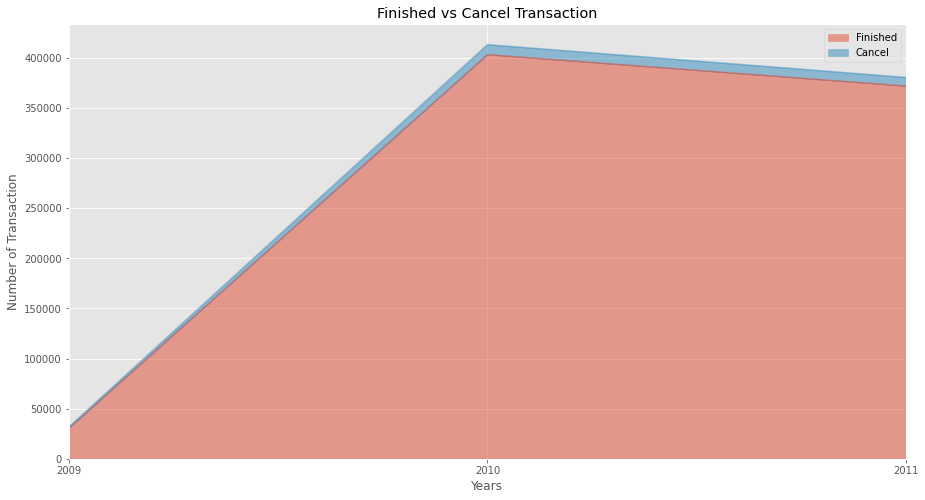

In [259]:
vis['Year'] = pd.to_datetime(vis['Year'], format='%Y')

vis.plot(x='Year',
          kind='area', 
             stacked=True,
             figsize=(15, 8),
         alpha = 0.5
             )

plt.title('Finished vs Cancel Transaction')
plt.ylabel('Number of Transaction')
plt.xlabel('Years')

plt.show()

### 2.4. Cancellation Rate

Menghitung Total

In [260]:
total = vis['Finished'] + vis['Cancel']
total

0     31776
1    413013
2    380325
dtype: int64

Cancellation rate per tahun

In [261]:
cancel_rate = vis['Cancel'] / total * 100
cancel_rate.values.tolist()
for i in range(len(cancel_rate)):
  print(2009 + i, " memiliki cancellation rate ", cancel_rate[i], "%")

2009  memiliki cancellation rate  3.194234642497482 %
2010  memiliki cancellation rate  2.4016193194887325 %
2011  memiliki cancellation rate  2.2507066324853744 %


### 2.5. Interpretation

Dari hasil nomor 2.3 dapat dilihat visualisasi antara transaksi yang berhasil dan cancel, sementara pada nomor 2.4 dapat dilihat cancellation rate. Tiap tahun, cancellation rate mengalami penurunan sehingga merupakan kemajuan bagi ritel online karena semakin banyak pelanggan yang tidak melakukan cancel. 